In [19]:
import pandas as pd
import numpy as np

In [22]:
DiabetesAllDummy = pd.read_csv('DiabetesAllDummy.csv', index_col=0)
#DiabetesOrdMed = pd.read_csv('DiabetesOrdMed.csv', index_col=0)

In [23]:
#Let's just start by looking at a simple linear regression:
#Yes, we have a categorical variable as our output. This will not be valid, but will show right away variables which could be important:

DiabetesTrain = DiabetesAllDummy[DiabetesAllDummy['IsTrain']==1]
DiabetesTrain = DiabetesTrain.drop('IsTrain', axis=1)
DiabetesTrain.index = list(range(len(DiabetesTrain)))

DiabetesTest = DiabetesAllDummy[DiabetesAllDummy['IsTrain']==0]
DiabetesTest = DiabetesTest.drop('IsTrain', axis=1)
DiabetesTest.index = list(range(len(DiabetesTest)))

In [5]:
#This is commented out because it took a VERY long time
'''from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier as rfc

#We will perform a grid search to find the optimal hyperparameters for our RF algorithm and test using our K-fold data:

# C value is the one most important for tuning a logistic regression. Let's see how varying this value affects the score:
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
max_features = ['sqrt', 'log2']


# Create the random grid
random_grid = {'min_samples_split': min_samples_split, 'n_estimators':n_estimators,
              'max_depth':max_depth, 'max_features':max_features, 'min_samples_leaf':min_samples_leaf}

# Use the random grid to search for best C hyperparameter:

# First create the base model to tune
rftune = rfc()

# Random search of parameters, using 5-fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rftune, scoring='f1', param_distributions = random_grid, n_iter = 100, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 3)

# Fit the random search model
rf_random.fit(trainX, trainY)

#Then print the best parameters using best_params_
rf_random.best_params_'''

print('Commented Out')

Commented Out


In [24]:
#Import the conditions from the F-score-optimized grid search:
#This DF still has all features at the moment
from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60)

#Create X and Y variables (replace 2 to 1 and 1 to 0)
trainX = DiabetesTrain.drop('readmitted', axis=1)
trainY = DiabetesTrain['readmitted'].replace([2, 1], [1, 0])

testX = DiabetesTest.drop('readmitted', axis=1)
testY = DiabetesTest['readmitted'].replace([2, 1], [1, 0])

#Run ths fit with the initial DF with all conditions:
rfc.fit(trainX, trainY)
actual = trainY.values

predictprobs = rfc.predict_proba(trainX)
predictvalues = rfc.predict(trainX)

predicttest = rfc.predict(testX)
predicttestprobs = rfc.predict_proba(testX)

R2 = rfc.score(trainX, trainY)
TestR2 = rfc.score(testX, testY)

In [28]:
#Make feature importances list:
FIAllDummyAllFeatures = pd.DataFrame({'Feature':pd.Series(trainX.columns), 'Importance':rfc.feature_importances_})

In [32]:
FIAllDummyAllFeatures = FIAllDummyAllFeatures.sort_values('Importance', ascending=False)
FIAllDummyAllFeatures

,Feature,Importance
2,num_lab_procedures,9.994955e-02
4,num_medications,8.608415e-02
7,number_inpatient,5.880484e-02
1,time_in_hospital,5.844174e-02
0,age,4.955290e-02
3,num_procedures,4.193598e-02
8,number_diagnoses,3.873384e-02
5,number_outpatient,2.267204e-02
6,number_emergency,2.054764e-02
37,gender_Male,1.793939e-02


In [33]:
from sklearn.metrics import roc_auc_score as AUC

#0.657 AUC for the AllDummy DF, random forest, with all features used
AUC(testY, predicttestprobs[:,1])

0.657438557521296

In [34]:
#93.3% accuracy for the train set
print(rfc.score(trainX, trainY))

0.9328829728784775


In [35]:
#88.6 percent accuracy sounds good, but is essentially no better than guessing "No" for everything
print(rfc.score(testX, testY))

0.8868197703444832


In [36]:
print(len(predicttestprobs[:,1][predicttestprobs[:,1]>0.20]))
#This predictor estimates that there is an 11.6 percent chance in the train set
#np.sum(predictvalues)
print(np.sum(predicttest))
print(len(predicttest))
#The test classifier predicts 20/20030 hits (less than 1%), despite >11% being positive
#We would need to set the threshhold to about 20% to get 11% hits

2256
16
20030


In [37]:
#I'm curious how effective that cutoff (20%) would be:
predictedY = testY[predicttestprobs[:,1]>0.20]
predictedN = testY[predicttestprobs[:,1]<=0.2]

print(len(predictedY))
print(len(predictedN))
print(np.sum(predictedY))
print(np.sum(predictedN))

print(np.sum((1-predictedY)**2) + np.sum(predictedN**2))

#At this cutoff, we made 20030 predictions. 2281 were yes (577 right, 1704 wrong); 17749 were no (16055 right, 1694 wrong). 
#This is only 83.0 percent accurate, worse than simply guessing no for everything

2256
17774
554
1717
3419


In [38]:
#I'm curious how effective that cutoff (20%) would be:
predictedY = testY[predicttestprobs[:,1]>0.50]
predictedN = testY[predicttestprobs[:,1]<=0.5]

print(len(predictedY))
print(len(predictedN))
print(np.sum(predictedY))
print(np.sum(predictedN))

print(np.sum((1-predictedY)**2) + np.sum(predictedN**2))

#Here, we predict 20 positives (yet still only 12 of them are actually positive... what??) and a slew of negatives, which have a standard 11% error rate.

16
20014
10
2261
2267


In [39]:
np.sum((predicttestprobs[:,1]-testY)**2)/len(testY)
#This prediction is an actual 9.6% error rate, better than simply predicting "No" for everything. How do we capture this?

0.09640828507084578

In [41]:
#Try this model with reduced features (top90):

from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60)

#Create X and Y variables (replace 2 to 1 and 1 to 0)
trainX = DiabetesTrain.drop('readmitted', axis=1)
trainX = trainX.drop(list(FIAllDummyAllFeatures['Feature'][91:110]), axis=1)

testX = DiabetesTest.drop('readmitted', axis=1)
testX = testX.drop(list(FIAllDummyAllFeatures['Feature'][91:110]), axis=1)

#Run ths fit with the initial DF with all conditions:
rfc.fit(trainX, trainY)
actual = trainY.values

predictprobs = rfc.predict_proba(trainX)
predictvalues = rfc.predict(trainX)

predicttest = rfc.predict(testX)
predicttestprobs = rfc.predict_proba(testX)

R2 = rfc.score(trainX, trainY)
TestR2 = rfc.score(testX, testY)

In [42]:
AUC(testY, predicttestprobs[:,1])

0.6569262305436934

In [43]:
#Try this model with reduced features (top50):

from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60)

#Create X and Y variables (replace 2 to 1 and 1 to 0)
trainX = DiabetesTrain.drop('readmitted', axis=1)
trainX = trainX.drop(list(FIAllDummyAllFeatures['Feature'][51:110]), axis=1)

testX = DiabetesTest.drop('readmitted', axis=1)
testX = testX.drop(list(FIAllDummyAllFeatures['Feature'][51:110]), axis=1)

#Run ths fit with the initial DF with all conditions:
rfc.fit(trainX, trainY)
actual = trainY.values

predictprobs = rfc.predict_proba(trainX)
predictvalues = rfc.predict(trainX)

predicttest = rfc.predict(testX)
predicttestprobs = rfc.predict_proba(testX)

R2 = rfc.score(trainX, trainY)
TestR2 = rfc.score(testX, testY)

In [44]:
#As we remove features, we are losing AUC and predictive value
AUC(testY, predicttestprobs[:,1])

0.6502799022352432

In [45]:
#Now do this same analysis for dataset2 (meds reduced from up down steady no to change steady no)

DiabetesAnyChange = pd.read_csv('DiabetesAnyChange.csv', index_col=0)

DiabetesTrain2 = DiabetesAnyChange[DiabetesAnyChange['IsTrain']==1].drop('IsTrain', axis=1)
DiabetesTrain2.index = list(range(len(DiabetesTrain2)))

DiabetesTest2 = DiabetesAnyChange[DiabetesAnyChange['IsTrain']==0].drop('IsTrain', axis=1)
DiabetesTest2.index = list(range(len(DiabetesTest2)))

trainX2 = DiabetesTrain2.drop('readmitted', axis=1)
trainY2 = DiabetesTrain2['readmitted'].replace([2, 1], [1, 0])

testX2 = DiabetesTest2.drop('readmitted', axis=1)
testY2 = DiabetesTest2['readmitted'].replace([2, 1], [1, 0])

#Import and run the model:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import RandomizedSearchCV
from sklearn.metrics import 


In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=6, 
                                   cv=4, verbose=5, random_state=42)


In [46]:
from sklearn.metrics import roc_auc_score as AUC

AUC(testY2, predicttestprobs[:,1])

0.6584383544749259

In [47]:
#Now do this same analysis for dataset3 (meds reduced from up down steady no to yes no)
#Set3


DiabetesTakingMed = pd.read_csv('DiabetesTakingMed.csv', index_col=0)

DiabetesTrain3 = DiabetesTakingMed[DiabetesTakingMed['IsTrain']==1].drop('IsTrain', axis=1)
DiabetesTrain3.index = list(range(len(DiabetesTrain3)))

DiabetesTest3 = DiabetesTakingMed[DiabetesTakingMed['IsTrain']==0].drop('IsTrain', axis=1)
DiabetesTest3.index = list(range(len(DiabetesTest3)))

trainX3 = DiabetesTrain3.drop('readmitted', axis=1)
trainY3 = DiabetesTrain3['readmitted'].replace([2, 1], [1, 0])

testX3 = DiabetesTest3.drop('readmitted', axis=1)
testY3 = DiabetesTest3['readmitted'].replace([2, 1], [1, 0])

#Import and run the model:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60)

rfc.fit(trainX3, trainY3)
predictprobs = rfc.predict_proba(trainX3)
predictvalues = rfc.predict(trainX3)
actual = trainY3.values

R2 = rfc.score(trainX3, trainY3)
#Run a test on the completely untouched test 20%
TestR2 = rfc.score(testX3, testY3)

predicttest = rfc.predict(testX3)
predicttestprobs = rfc.predict_proba(testX3)

In [48]:
from sklearn.metrics import roc_auc_score as AUC

#AUC values are slightly higher for TakingMEd and AnyChange DF's than for the AllDummy DF, but barely
AUC(testY3, predicttestprobs[:,1])

0.6582691656966237

In [101]:
from sklearn.metrics import brier_score_loss as BSL

BSL(testY3, predicttestprobs[:,1])

0.09642865717727499

In [49]:
AUC(testY3, predicttest)

0.5030209625231049

In [158]:
#What if we stack models? Would this improve predictions?

In [91]:
#Again, this is the base "TakingMed" random forest model:

DiabetesTakingMed = pd.read_csv('DiabetesTakingMed.csv', index_col=0)

DiabetesTrain3 = DiabetesTakingMed[DiabetesTakingMed['IsTrain']==1].drop('IsTrain', axis=1)
DiabetesTrain3.index = list(range(len(DiabetesTrain3)))

DiabetesTest3 = DiabetesTakingMed[DiabetesTakingMed['IsTrain']==0].drop('IsTrain', axis=1)
DiabetesTest3.index = list(range(len(DiabetesTest3)))

trainX3 = DiabetesTrain3.drop('readmitted', axis=1)
trainY3 = DiabetesTrain3['readmitted'].replace([2, 1], [1, 0])

testX3 = DiabetesTest3.drop('readmitted', axis=1)
testY3 = DiabetesTest3['readmitted'].replace([2, 1], [1, 0])

#Import and run the model:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60, random_state=100)

rfc.fit(trainX3, trainY3)
predictprobs = rfc.predict_proba(trainX3)
predictvalues = rfc.predict(trainX3)
actual = trainY3.values

R2 = rfc.score(trainX3, trainY3)
#Run a test on the completely untouched test 20%
TestR2 = rfc.score(testX3, testY3)

predicttestRF = rfc.predict(testX3)
predicttestprobsRF = rfc.predict_proba(testX3)

In [92]:
#Again, this model has an AUC of approximately 0.6584: (completely subject to random motion)
AUC(testY3, predicttestprobsRF[:,1])

0.6565265349173677

In [108]:
#Brier loss of 0.09658
BSL(testY3, predicttestprobsRF[:,1])

0.09658609386085505

In [94]:
#Train set AUC for random forest is essentially 1
AUC(trainY3, predictprobs[:,1])

0.9999808638460312

(array([2.7680e+03, 9.6040e+03, 1.3675e+04, 1.3263e+04, 1.1031e+04,
        7.7210e+03, 5.1680e+03, 3.0910e+03, 1.8890e+03, 1.1270e+03,
        6.2200e+02, 3.9300e+02, 2.5100e+02, 1.5000e+02, 9.8000e+01,
        5.5000e+01, 4.1000e+01, 2.2000e+01, 4.1000e+01, 6.4000e+01,
        1.0400e+02, 1.6100e+02, 2.6500e+02, 3.5600e+02, 5.0600e+02,
        6.5800e+02, 6.7900e+02, 7.6200e+02, 7.9000e+02, 7.6600e+02,
        6.8200e+02, 6.3700e+02, 5.0400e+02, 4.6300e+02, 3.5400e+02,
        2.9500e+02, 2.4200e+02, 2.0700e+02, 1.4400e+02, 1.3200e+02,
        9.3000e+01, 7.0000e+01, 4.1000e+01, 3.6000e+01, 2.4000e+01,
        1.8000e+01, 5.0000e+00, 2.0000e+00, 7.0000e+00, 7.0000e+00]),
 array([0.        , 0.01669964, 0.03339929, 0.05009893, 0.06679857,
        0.08349821, 0.10019786, 0.1168975 , 0.13359714, 0.15029679,
        0.16699643, 0.18369607, 0.20039571, 0.21709536, 0.233795  ,
        0.25049464, 0.26719429, 0.28389393, 0.30059357, 0.31729321,
        0.33399286, 0.3506925 , 0.36739214, 0.

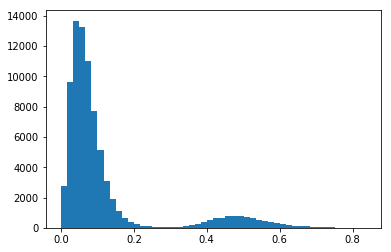

In [98]:
#The train set has an amazing ROC because it essentially predicts almost all positive hits above 50% and all negative hits below 50%
import matplotlib.pyplot as plt
plt.figure()
plt.hist(predictprobs[:,1], bins=50)

In [81]:
from sklearn.linear_model import LogisticRegression as lgr

lgr = lgr()
lgr.set_params(C=0.1)

lgr.fit(trainX3, trainY3)
predictprobs = lgr.predict_proba(trainX3)
predictvalues = lgr.predict(trainX3)
actual = trainY3.values

R2 = lgr.score(trainX3, trainY3)
#Run a test on the completely untouched test 20%
TestR2 = lgr.score(testX3, testY3)

predicttestLR = lgr.predict(testX3)
predicttestprobsLR = lgr.predict_proba(testX3)

In [82]:
#This model gives a similar (slightly higher) AUC than RF, which is a bit surprising
AUC(testY3, predicttestprobsLR[:,1])

0.6633660039876829

In [107]:
#Brier loss of 0.0966 (basically the same as RF)
BSL(testY3, predicttestprobsLR[:,1])

0.09661711502693517

(array([4.890e+02, 3.937e+03, 4.842e+03, 3.370e+03, 2.360e+03, 1.470e+03,
        9.090e+02, 5.990e+02, 4.320e+02, 3.240e+02, 2.620e+02, 1.930e+02,
        1.510e+02, 1.280e+02, 9.500e+01, 6.800e+01, 5.500e+01, 6.000e+01,
        3.600e+01, 3.800e+01, 2.400e+01, 3.300e+01, 2.100e+01, 1.800e+01,
        1.000e+01, 1.200e+01, 1.300e+01, 5.000e+00, 5.000e+00, 1.000e+01,
        4.000e+00, 4.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        2.000e+00, 7.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.04054502, 0.05776883, 0.07499264, 0.09221646, 0.10944027,
        0.12666408, 0.14388789, 0.1611117 , 0.17833551, 0.19555933,
        0.21278314, 0.23000695, 0.24723076, 0.26445457, 0.28167839,
        0.2989022 , 0.31612601, 0.33334982, 0.35057363, 0.36779745,
        0.38502126, 0.40224507, 0.41946888, 0.43669269, 0.4539165 ,
        0.47114032, 0.48836413, 0.50

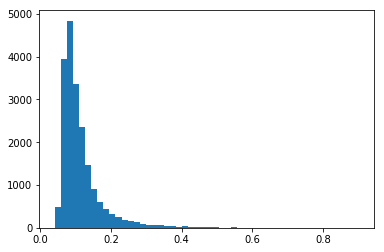

In [100]:

plt.figure()
plt.hist(predicttestprobsLR[:,1], bins=50)

In [83]:
#What if we stack them?
Stacked = predicttestprobsRF[:,1]/2 + predicttestprobsLR[:,1]/2
AUC(testY3, Stacked)
#We see that the AUC improves

0.6691439117243944

In [109]:
#RF: 0.09658
#Logistic 0.09662
#Stacked 0.09589

BSL(testY3, Stacked)

0.09589479267551076

In [86]:
np.sum((trainY3-predictvalues)**2)

9097

In [88]:
np.sum((trainY3-predictprobs[:,1])**2)

7742.787897266097

In [89]:
np.sum(predictvalues)

323

In [90]:
np.sum(trainY3)

9086

In [112]:
#Let's try with Chaorans cleaned label encoded DF:

DiabetesTakingMed = pd.read_csv('DiabetesTakingMed.csv', index_col=0)

DiabetesTrain4 = pd.read_csv('../Chaoran/le_train.csv', index_col=0)
DiabetesTrain4.index = list(range(len(DiabetesTrain4)))

DiabetesTest4 = pd.read_csv('../Chaoran/le_test.csv', index_col=0)
DiabetesTest4.index = list(range(len(DiabetesTest4)))

trainX4 = DiabetesTrain4.drop('readmitted', axis=1)
trainY4 = DiabetesTrain4['readmitted']

testX4 = DiabetesTest4.drop('readmitted', axis=1)
testY4 = DiabetesTest4['readmitted']

#Import and run the model:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc = rfc()
rfc.set_params(n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=60, random_state=100)

rfc.fit(trainX4, trainY4)
predictprobs = rfc.predict_proba(trainX4)
predictvalues = rfc.predict(trainX4)
actual = trainY4.values

R2 = rfc.score(trainX4, trainY4)
#Run a test on the completely untouched test 20%
TestR2 = rfc.score(testX4, testY4)

predicttestRF4 = rfc.predict(testX4)
predicttestprobsRF4 = rfc.predict_proba(testX4)

In [113]:
AUC(testY4, predicttestprobsRF4[:,1])

0.651514380870807

In [114]:
#RF: 0.09658
#Logistic 0.09662
#Stacked 0.09589
#Chaoran's 0.09817

BSL(testY4, predicttestprobsRF4[:,1])

0.09816923337393814

In [123]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(trainX3, trainY3)
predictprobs = gnb.predict_proba(trainX3)
predictvalues = gnb.predict(trainX3)
actual = trainY3.values

R2 = gnb.score(trainX3, trainY3)
#Run a test on the completely untouched test 20%
TestR2 = gnb.score(testX3, testY3)

predicttestNB = gnb.predict(testX3)
predicttestprobsNB = gnb.predict_proba(testX3)

In [124]:
#Simple gaussian NB has a much lower-performing model than the others:
AUC(testY3, predicttestprobsNB[:,1])

0.6300168387087172

In [125]:
#RF: 0.09658
#Logistic 0.09662
#Stacked 0.09589
#Chaoran's 0.09817
#Gaussian NB: 0.14234

BSL(testY3, predicttestprobsNB[:,1])

0.14234021845944153